In [1]:
from xcube.core.dsio import open_cube
from xcube.core.resample import resample_in_time
from xcube.core.geom import mask_dataset_by_geometry
from xcube.core.extract import get_cube_values_for_points

import IPython.display

import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr

xr.set_options(display_style="html")

import warnings
warnings.filterwarnings("ignore")

---

#### Index

This notebook contains three examples:

1. Create monthly CHL aggregations for specific regions
2. Compute monthly CHL "anomalies" 
3. Compare Cube CHL with In-Situ CHL


#### Installation

For creating an `xcube` Python environment and installing `xcube` follow the instructions given in the [xcube's README](https://github.com/dcs4cop/xcube/blob/master/README.md).

Before using Jupyter Lab for the first time install the `jupyterlab` package and make sure the 
[Jupyter GeoJSON extension](https://www.npmjs.com/package/@jupyterlab/geojson-extension) is installed too:

```bash
(xcube) conda install -c conda-forge jupyterlab
(xcube) jupyter labextension install @jupyterlab/geojson-extension
```


---

## Create monthly CHL aggregations for specific regions

Open demo data cube with CHL, TSM, and Turbidity for 2017:

In [2]:
cube = open_cube('https://s3.eu-central-1.amazonaws.com/dcs4cop/bc-olci-sns-l2c-2017_1x1024x1024.zarr')
cube

<xarray.Dataset>
Dimensions:         (bnds: 2, lat: 5632, lon: 10240, time: 1479)
Coordinates:
  * lat             (lat) float64 62.67 62.66 62.66 62.66 ... 48.01 48.0 48.0
    lat_bnds        (lat, bnds) float64 dask.array<chunksize=(5632, 2), meta=np.ndarray>
  * lon             (lon) float64 -16.0 -16.0 -15.99 ... 10.66 10.66 10.67
    lon_bnds        (lon, bnds) float64 dask.array<chunksize=(10240, 2), meta=np.ndarray>
  * time            (time) datetime64[ns] 2017-01-01T09:57:21.976999680 ... 2017-12-31T11:01:54.808000
    time_bnds       (time, bnds) datetime64[ns] dask.array<chunksize=(1479, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc       (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    tsm_c2rcc       (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    tur_nechad_665  (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
Attributes:
    acknowledgment:             ESA Sentinel-3 OLCI data, EU HIGHROC project
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-consult.de
    creator_name:               Brockmann Consult GmbH
    creator_url:                https://www.brockmann-consult.de
    date_modified:              2019-09-12T08:09:32.908854
    geospatial_lat_max:         62.666666666666664
    geospatial_lat_min:         48.0
    geospatial_lat_resolution:  0.002604166666666666
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         10.666666666666664
    geospatial_lon_min:         -16.0
    geospatial_lon_resolution:  0.0026041666666666665
    geospatial_lon_units:       degrees_east
    history:                    xcube/reproj-snap-nc
    id:                         dcs4cop-bc-olci-sns-l2c-v1
    institution:                Brockmann Consult GmbH
    keywords:                   
    license:                    terms and conditions of the DCS4COP data dist...
    naming_authority:           bc
    processing_level:           L2C
    project:                    DCS4COP
    publisher_email:            info@brockmann-consult.de
    publisher_name:             Brockmann Consult GmbH
    publisher_url:              https://www.brockmann-consult.de
    references:                 https://dcs4cop.eu/
    source:                     Sentinel-3 OLCI L2 surface observation
    standard_name_vocabulary:   
    summary:                    
    title:                      DCS4COP Sentinel-3 OLCI L2C Data Cube

Read Shapefile with Northsea regions according to Water Framework Directive (WFD):

In [3]:
regions = gpd.read_file('WRRL_Klassen_Nordsee/WRRL_Klassen_Nordsee_latlon3.shp')
regions

,TEMPLATE,EU_CD_CW,NAME,MS_CD_CW,CHAR_TYPE,TY_CW_CD,TY_NA_CW,INS_WHEN,INS_BY,STATUS_YR,...,RISK_ECST,RISK_DATE,AREA,PERIMETER,HECTARES,KM2,Anz_Sand,Anz_Misch,Anz_Schlic,geometry
0,Cwbody,DE_CW_N2_4900_01,Wattenmeer Jadebusen und angrenzende Küstenabs...,N2_4900_01,B,NEA2,Euhalines Wattenmeer,2004-06-30,R. Kaiser,2004,...,2,None,4.043428e+08,151288.473,40434.284,404,0,0,0,"POLYGON ((7.996976514102047 53.77217253183354,..."
1,Cwbody,DE_CW_N4_4900_01,Westliches Wattenmeer der Weser,N4_4900_01,B,NEA4,Polyhalines Wattenmeer,2004-06-30,R. Kaiser,2004,...,2,None,6.855388e+07,41317.935,6855.388,69,40341,13562,1641,"POLYGON ((8.160753124569501 53.72307542323224,..."
2,Cwbody,DE_CW_N1_4900_01,Offenes Küstengewässer vor Jadebusen,N1_4900_01,B,NEA1,Euhalines offenes Küstengewässer (Nordsee),2004-06-30,R. Kaiser,2004,...,2,None,1.715100e+08,61861.123,17151.002,172,10711,372,47,"POLYGON ((8.152944979657608 53.73094689165663,..."
3,Cwbody,DE_CW_N3_4900_01,Offenes Küstengewässer der Weser,N3_4900_01,B,NEA3,Polyhalines offenes Küstengewässer (Nordsee),2004-06-30,R. Kaiser,2004,...,2,None,4.177503e+08,95859.775,41775.029,418,58207,3053,531,"POLYGON ((8.393759920943811 53.90750318957006,..."
4,Cwbody,DE_CW_N1_3100_01,Euhalines offenes Küstengewässer der Ems,N1_3100_01,B,NEA1,Euhalines offenes Küstengewässer (Nordsee),2004-06-30,R. Kaiser,2004,...,2,None,2.727468e+08,211950.805,27274.677,273,0,0,0,(POLYGON ((7.970729429552603 53.77605957246801...
5,Cwbody,DE_CW_N4_4900_02,Östliches Wattenmeer der Weser,N4_4900_02,B,NEA4,Polyhalines Wattenmeer,2004-06-30,R. Kaiser,2004,...,2,None,2.258952e+08,67440.138,22589.521,226,105158,47891,13176,"POLYGON ((8.411523456982321 53.69451929656055,..."
6,Cwbody,DE_CW_NO.3900_01,Küstenmeer Ems,NO.3900_01,B,N0,Küstenmeer jenseits der 1SM-Grenze,2004-06-30,R. Kaiser,2004,...,2,None,1.825506e+09,220270.200,182550.589,1826,0,0,0,"POLYGON ((7.883153378800836 53.83487490766301,..."
7,Cwbody,DE_CW_NO.4000_01,Küstenmeer Weser,NO.4000_01,B,N0,Küstenmeer jenseits der 1SM-Grenze,2004-06-30,R. Kaiser,2004,...,2,None,2.929415e+08,84389.209,29294.154,293,0,0,0,"POLYGON ((8.056326782804073 53.89214351776224,..."
8,Cwbody,DE_CW_N4_3990_01,Ems Wattenmeer,N4_3990_01,B,NEA4,Polyhalines Wattenmeer,2004-06-30,R. Kaiser,2004,...,2,None,4.110000e-01,80.932,0.000,0,0,0,0,"POLYGON ((6.903083190197316 53.44542223804972,..."
9,Cwbody,DE_CW_N4_3100_01,Polyhalines Wattenmeer der Ems,N4_3100_01,B,NEA4,Polyhalines Wattenmeer,2004-06-30,R. Kaiser,2004,...,2,None,4.859628e+08,172900.649,48596.278,486,211545,97316,13319,"POLYGON ((6.717745494147611 53.56557750121841,..."


In [4]:
IPython.display.GeoJSON(regions.__geo_interface__)

<IPython.display.GeoJSON object>

The remaining steps can be done in a loop over all regions. However, for this demonstration we just pick a single random region:

In [5]:
# region = regions.loc[regions['NAME'] == 'Küstenmeer Elbe']
# region = regions.loc[regions['NAME'] == 'Küstenmeer Eider']
region = regions.loc[regions['NAME'] == 'Küstenmeer Ems']
region

,TEMPLATE,EU_CD_CW,NAME,MS_CD_CW,CHAR_TYPE,TY_CW_CD,TY_NA_CW,INS_WHEN,INS_BY,STATUS_YR,...,RISK_ECST,RISK_DATE,AREA,PERIMETER,HECTARES,KM2,Anz_Sand,Anz_Misch,Anz_Schlic,geometry
6,Cwbody,DE_CW_NO.3900_01,Küstenmeer Ems,NO.3900_01,B,N0,Küstenmeer jenseits der 1SM-Grenze,2004-06-30,R. Kaiser,2004,...,2,None,1.825506e+09,220270.2,182550.589,1826,0,0,0,"POLYGON ((7.883153378800836 53.83487490766301,..."


In [6]:
IPython.display.GeoJSON(region.__geo_interface__)

<IPython.display.GeoJSON object>

Note, this reagion is still a data frame, whose geometry is a one-element series. That's is how we get the actual geometry object: 

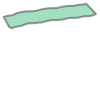

In [7]:
polygon = region.geometry.values[0]
polygon

We'll now narrow down the data cube to that selected region and mask out all values that don't intersect with the region polygon:

In [8]:
cube_masked = mask_dataset_by_geometry(cube, polygon)
cube_masked

<xarray.Dataset>
Dimensions:         (bnds: 2, lat: 146, lon: 546, time: 1479)
Coordinates:
  * lat             (lat) float64 54.0 53.99 53.99 53.99 ... 53.62 53.62 53.62
  * lon             (lon) float64 6.465 6.467 6.47 6.473 ... 7.879 7.882 7.884
  * time            (time) datetime64[ns] 2017-01-01T09:57:21.976999680 ... 2017-12-31T11:01:54.808000
    lat_bnds        (lat, bnds) float64 dask.array<chunksize=(146, 2), meta=np.ndarray>
    lon_bnds        (lon, bnds) float64 dask.array<chunksize=(546, 2), meta=np.ndarray>
    time_bnds       (time, bnds) datetime64[ns] dask.array<chunksize=(1479, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc       (time, lat, lon) float64 dask.array<chunksize=(1, 146, 546), meta=np.ndarray>
    tsm_c2rcc       (time, lat, lon) float64 dask.array<chunksize=(1, 146, 546), meta=np.ndarray>
    tur_nechad_665  (time, lat, lon) float64 dask.array<chunksize=(1, 146, 546), meta=np.ndarray>
Attributes:
    acknowledgment:             ESA Sentinel-3 OLCI data, EU HIGHROC project
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-consult.de
    creator_name:               Brockmann Consult GmbH
    creator_url:                https://www.brockmann-consult.de
    date_modified:              2020-01-21T21:15:24.417024
    geospatial_lat_max:         53.99739583333333
    geospatial_lat_min:         53.6171875
    geospatial_lat_resolution:  0.0026041666666666344
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         7.885416666666666
    geospatial_lon_min:         6.463541666666664
    geospatial_lon_resolution:  0.00260416666666667
    geospatial_lon_units:       degrees_east
    history:                    xcube/reproj-snap-nc
    id:                         dcs4cop-bc-olci-sns-l2c-v1
    institution:                Brockmann Consult GmbH
    keywords:                   
    license:                    terms and conditions of the DCS4COP data dist...
    naming_authority:           bc
    processing_level:           L2C
    project:                    DCS4COP
    publisher_email:            info@brockmann-consult.de
    publisher_name:             Brockmann Consult GmbH
    publisher_url:              https://www.brockmann-consult.de
    references:                 https://dcs4cop.eu/
    source:                     Sentinel-3 OLCI L2 surface observation
    standard_name_vocabulary:   
    summary:                    
    title:                      DCS4COP Sentinel-3 OLCI L2C Data Cube

Next, we resample the masked and clipped cube to monthly averages:

In [9]:
cube_1m = resample_in_time(cube_masked, frequency='1M', method='mean')
cube_1m

<xarray.Dataset>
Dimensions:              (bnds: 2, lat: 146, lon: 546, time: 13)
Coordinates:
  * time                 (time) datetime64[ns] 2016-12-31 ... 2017-12-31
    lat_bnds             (lat, bnds) float64 dask.array<chunksize=(146, 2), meta=np.ndarray>
    lon_bnds             (lon, bnds) float64 dask.array<chunksize=(546, 2), meta=np.ndarray>
  * lon                  (lon) float64 6.465 6.467 6.47 ... 7.879 7.882 7.884
  * lat                  (lat) float64 54.0 53.99 53.99 ... 53.62 53.62 53.62
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc_mean       (time, lat, lon) float64 dask.array<chunksize=(1, 146, 546), meta=np.ndarray>
    tsm_c2rcc_mean       (time, lat, lon) float64 dask.array<chunksize=(1, 146, 546), meta=np.ndarray>
    tur_nechad_665_mean  (time, lat, lon) float64 dask.array<chunksize=(1, 146, 546), meta=np.ndarray>
Attributes:
    acknowledgment:             ESA Sentinel-3 OLCI data, EU HIGHROC project
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-consult.de
    creator_name:               Brockmann Consult GmbH
    creator_url:                https://www.brockmann-consult.de
    date_modified:              2020-01-21T21:15:24.417024
    geospatial_lat_max:         53.99739583333333
    geospatial_lat_min:         53.6171875
    geospatial_lat_resolution:  0.0026041666666666344
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         7.885416666666666
    geospatial_lon_min:         6.463541666666664
    geospatial_lon_resolution:  0.00260416666666667
    geospatial_lon_units:       degrees_east
    history:                    xcube/reproj-snap-nc
    id:                         dcs4cop-bc-olci-sns-l2c-v1
    institution:                Brockmann Consult GmbH
    keywords:                   
    license:                    terms and conditions of the DCS4COP data dist...
    naming_authority:           bc
    processing_level:           L2C
    project:                    DCS4COP
    publisher_email:            info@brockmann-consult.de
    publisher_name:             Brockmann Consult GmbH
    publisher_url:              https://www.brockmann-consult.de
    references:                 https://dcs4cop.eu/
    source:                     Sentinel-3 OLCI L2 surface observation
    standard_name_vocabulary:   
    summary:                    
    title:                      DCS4COP Sentinel-3 OLCI L2C Data Cube
    time_coverage_start:        <xarray.DataArray 'time' ()>\narray('2017-01-...
    time_coverage_end:          <xarray.DataArray 'time' ()>\narray('2017-12-...

In [10]:
cube_1m.time

<xarray.DataArray 'time' (time: 13)>
array(['2016-12-31T00:00:00.000000000', '2017-01-31T00:00:00.000000000',
       '2017-02-28T00:00:00.000000000', '2017-03-31T00:00:00.000000000',
       '2017-04-30T00:00:00.000000000', '2017-05-31T00:00:00.000000000',
       '2017-06-30T00:00:00.000000000', '2017-07-31T00:00:00.000000000',
       '2017-08-31T00:00:00.000000000', '2017-09-30T00:00:00.000000000',
       '2017-10-31T00:00:00.000000000', '2017-11-30T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-12-31 2017-01-31 ... 2017-12-31

We will frequently use the data `cube_1m` in the following steps, so that we benefit if we load them all into memory:

In [12]:
cube_1m = cube_1m.load()

We are going to work with the CHL values only, therefore:

In [13]:
chl = cube_1m.chl_c2rcc_mean

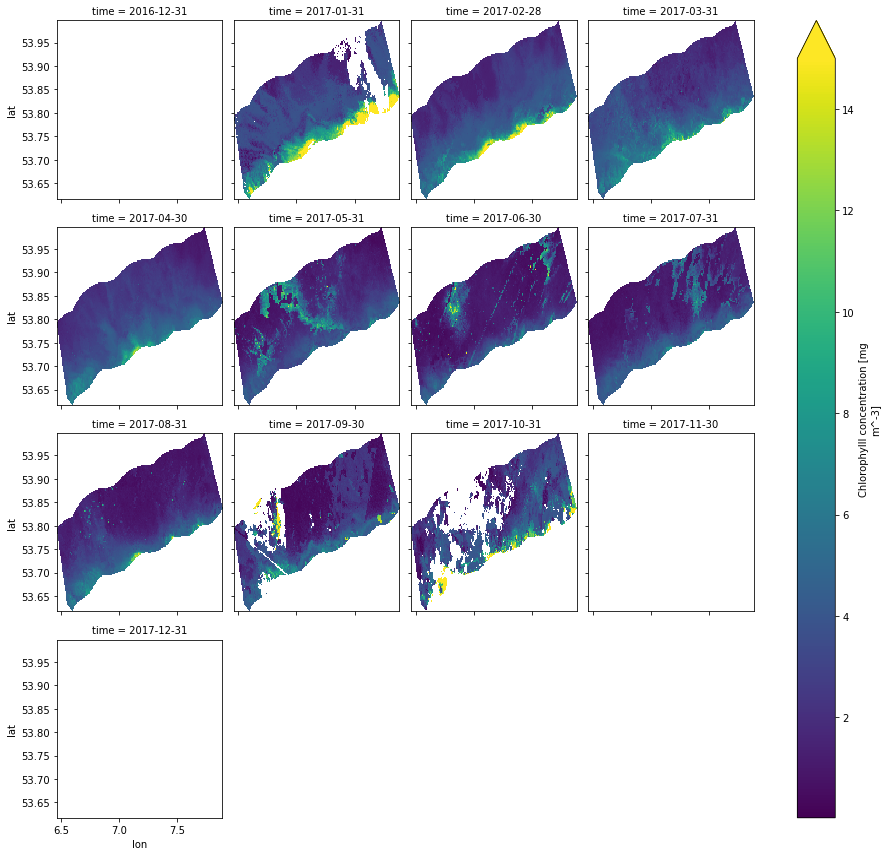

In [15]:
chl.plot.imshow(col='time', col_wrap=4, vmax=15)

Now we can compute time series of the mean, median and the p90 values:

In [16]:
chl_mean = chl.mean(dim=['lat', 'lon'])
chl_p50 = chl.median(dim=['lat', 'lon'])
chl_p90 = chl.quantile(0.9, dim=['lat', 'lon'])

In [17]:
chl_ts_ds = xr.Dataset(dict(chl_mean=chl_mean, chl_p50=chl_p50, chl_p90=chl_p90))
chl_ts_df = chl_ts_ds.to_dataframe().drop('quantile', axis=1)
chl_ts_df

,chl_mean,chl_p50,chl_p90
time,,,
2016-12-31,NaN,NaN,NaN
2017-01-31,4.547736,3.609405,9.218224
2017-02-28,3.638575,3.166796,5.873994
2017-03-31,3.674974,3.423619,5.903209
2017-04-30,3.262771,2.890220,5.164213
2017-05-31,2.833770,2.226355,5.466666
2017-06-30,1.991946,1.211070,4.383509
2017-07-31,2.326900,1.612868,4.596536
2017-08-31,2.281199,1.643400,4.686294


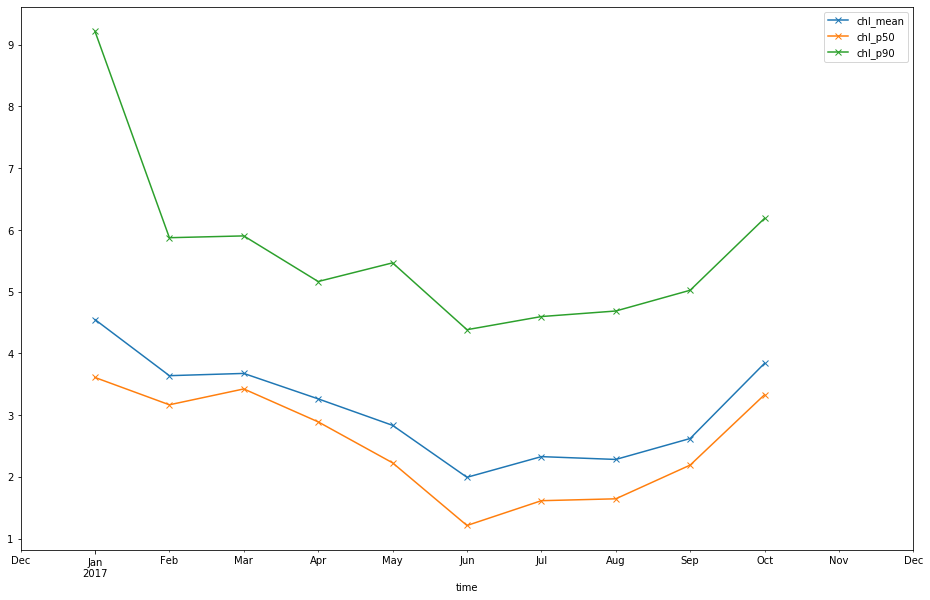

In [18]:
chl_ts_df.plot.line(figsize=(16,10), marker='x')

---

## Compute monthly CHL "anomalies" 

The following steps explain, how to compute the "anomaly" of every month for the selected region with respect to the mean of all months in 2017:

In [19]:
chl_mean = chl.mean(dim='time')
chl_mean

<xarray.DataArray 'chl_c2rcc_mean' (lat: 146, lon: 546)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 6.465 6.467 6.47 6.473 ... 7.876 7.879 7.882 7.884
  * lat      (lat) float64 54.0 53.99 53.99 53.99 ... 53.63 53.62 53.62 53.62

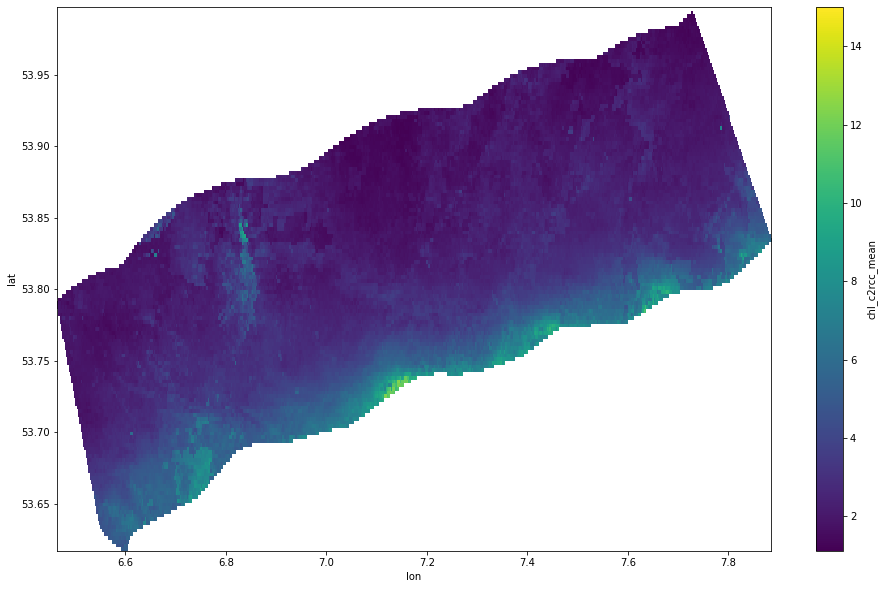

In [20]:
chl_mean.plot.imshow(vmax=15, figsize=(16,10))

In [21]:
chl_anomaly = chl - chl_mean

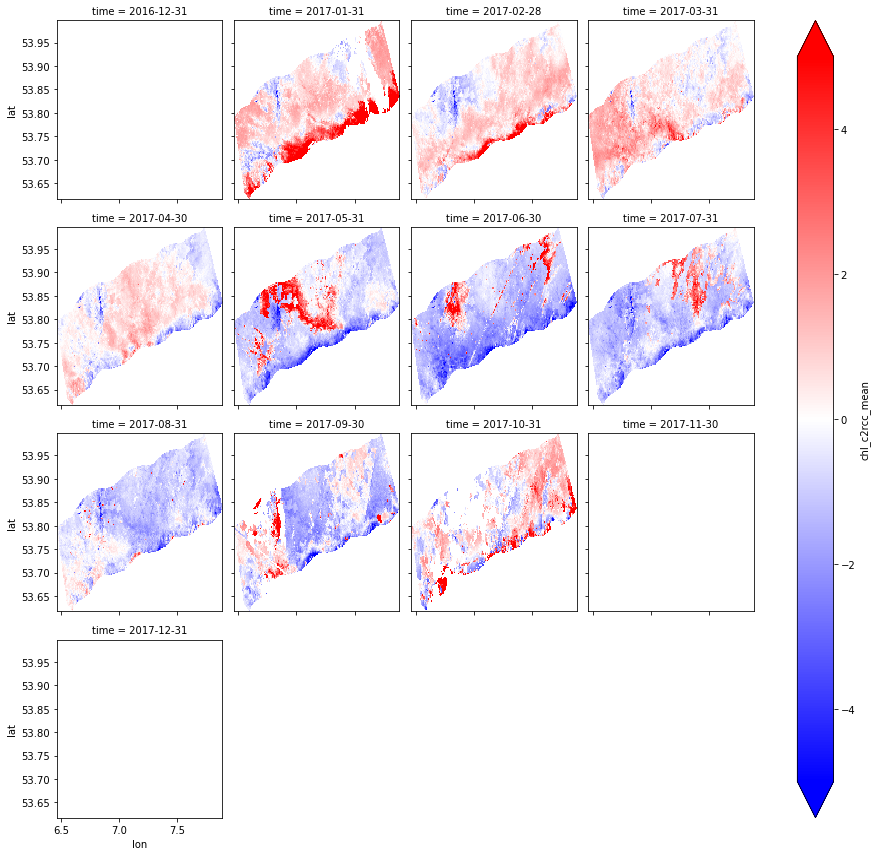

In [22]:
chl_anomaly.plot.imshow(col='time', col_wrap=4, cmap='bwr', vmin=-5, vmax=5)

---

## Compare Cube CHL with In-Situ CHL

**WARNING:** The following analysis provided here does not reflect the way how validation of CHL values is done or should be done! This is just for demonstration purposes.

Read some in-situ data points from a shiptrack made by BSH in Summer 2017: 

In [23]:
cruise = pd.read_csv('./summercruise_2017_positions_for_pixex.txt', delimiter='\t', converters={'DateTime': np.datetime64})
cruise

,Name,latitude,longitude,DateTime,Chlorophyll-a_Jeff_Humphr,Phaeophytin_Jeff_Humphr,Chlorophyll_ges,SD,TUR
0,GN003,54.001833,8.111167,2017-08-12 14:57:00,5.939,1.244,6.560,4.5,1.449
1,GN008,54.000167,4.830667,2017-08-13 05:03:00,1.319,0.274,1.456,3.5,0.185
2,GN009,54.000000,2.999500,2017-08-13 13:12:00,0.415,0.093,0.461,NaN,0.036
3,GN011,52.511333,4.325500,2017-08-14 05:10:00,7.216,1.444,7.938,12.0,0.061
4,GN012,51.998500,3.730000,2017-08-14 10:21:00,2.642,0.554,2.919,6.0,0.078
5,GN013,51.699500,2.857667,2017-08-14 14:03:00,1.715,0.360,1.895,5.5,0.121
6,GN014,52.006333,2.007833,2017-08-14 18:51:00,1.933,0.400,2.133,3.0,0.440
7,GN016,53.330500,1.671500,2017-08-15 05:23:00,0.666,0.140,0.736,11.0,0.050
8,GN017,54.000667,0.996333,2017-08-15 14:10:00,1.677,0.351,1.852,10.5,0.040
9,GN018,55.004500,-0.007333,2017-08-16 03:44:00,0.937,0.199,1.037,NaN,0.026


Since we want to compare the points with data in the cube, we need to match the names of coordinate variables first, so we rename the columns:

In [30]:
cruise = cruise.rename(columns={'longitude': 'lon', 'latitude': 'lat', 'DateTime': 'time'})
cruise['ID'] = np.arange(0, len(cruise))

Where are these points?

In [31]:
from shapely.geometry import Point
cruise_geom = gpd.GeoDataFrame(cruise.drop(['lon', 'lat'], axis=1), crs={'init': 'epsg:4326'}, geometry=[Point(xy) for xy in zip(cruise.lon, cruise.lat)])
IPython.display.GeoJSON(cruise_geom.__geo_interface__)

<IPython.display.GeoJSON object>

We now select that month from the cube (no need to do this, this is an optional step for demonstration only):

In [32]:
cube_subset = cube.sel(time='2017-08')
cube_subset

<xarray.Dataset>
Dimensions:         (bnds: 2, lat: 5632, lon: 10240, time: 136)
Coordinates:
  * lat             (lat) float64 62.67 62.66 62.66 62.66 ... 48.01 48.0 48.0
    lat_bnds        (lat, bnds) float64 dask.array<chunksize=(5632, 2), meta=np.ndarray>
  * lon             (lon) float64 -16.0 -16.0 -15.99 ... 10.66 10.66 10.67
    lon_bnds        (lon, bnds) float64 dask.array<chunksize=(10240, 2), meta=np.ndarray>
  * time            (time) datetime64[ns] 2017-08-01T09:59:56.478000128 ... 2017-08-31T10:25:06.892000256
    time_bnds       (time, bnds) datetime64[ns] dask.array<chunksize=(136, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc       (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    tsm_c2rcc       (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    tur_nechad_665  (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
Attributes:
    acknowledgment:             ESA Sentinel-3 OLCI data, EU HIGHROC project
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-consult.de
    creator_name:               Brockmann Consult GmbH
    creator_url:                https://www.brockmann-consult.de
    date_modified:              2019-09-12T08:09:32.908854
    geospatial_lat_max:         62.666666666666664
    geospatial_lat_min:         48.0
    geospatial_lat_resolution:  0.002604166666666666
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         10.666666666666664
    geospatial_lon_min:         -16.0
    geospatial_lon_resolution:  0.0026041666666666665
    geospatial_lon_units:       degrees_east
    history:                    xcube/reproj-snap-nc
    id:                         dcs4cop-bc-olci-sns-l2c-v1
    institution:                Brockmann Consult GmbH
    keywords:                   
    license:                    terms and conditions of the DCS4COP data dist...
    naming_authority:           bc
    processing_level:           L2C
    project:                    DCS4COP
    publisher_email:            info@brockmann-consult.de
    publisher_name:             Brockmann Consult GmbH
    publisher_url:              https://www.brockmann-consult.de
    references:                 https://dcs4cop.eu/
    source:                     Sentinel-3 OLCI L2 surface observation
    standard_name_vocabulary:   
    summary:                    
    title:                      DCS4COP Sentinel-3 OLCI L2C Data Cube

We now resample that month to weekly averages in order to increase the probability that we find match-ups:

In [33]:
cube_1w = resample_in_time(cube_subset, frequency='1W', method='mean')
cube_1w

<xarray.Dataset>
Dimensions:              (bnds: 2, lat: 5632, lon: 10240, time: 5)
Coordinates:
  * time                 (time) datetime64[ns] 2017-07-30 ... 2017-08-27
    lat_bnds             (lat, bnds) float64 dask.array<chunksize=(1024, 2), meta=np.ndarray>
    lon_bnds             (lon, bnds) float64 dask.array<chunksize=(1024, 2), meta=np.ndarray>
  * lon                  (lon) float64 -16.0 -16.0 -15.99 ... 10.66 10.66 10.67
  * lat                  (lat) float64 62.67 62.66 62.66 ... 48.01 48.0 48.0
Dimensions without coordinates: bnds
Data variables:
    chl_c2rcc_mean       (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    tsm_c2rcc_mean       (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
    tur_nechad_665_mean  (time, lat, lon) float64 dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
Attributes:
    acknowledgment:             ESA Sentinel-3 OLCI data, EU HIGHROC project
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-consult.de
    creator_name:               Brockmann Consult GmbH
    creator_url:                https://www.brockmann-consult.de
    date_modified:              2019-09-12T08:09:32.908854
    geospatial_lat_max:         62.666666666666664
    geospatial_lat_min:         48.0
    geospatial_lat_resolution:  0.002604166666666666
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         10.666666666666664
    geospatial_lon_min:         -16.0
    geospatial_lon_resolution:  0.0026041666666666665
    geospatial_lon_units:       degrees_east
    history:                    xcube/reproj-snap-nc
    id:                         dcs4cop-bc-olci-sns-l2c-v1
    institution:                Brockmann Consult GmbH
    keywords:                   
    license:                    terms and conditions of the DCS4COP data dist...
    naming_authority:           bc
    processing_level:           L2C
    project:                    DCS4COP
    publisher_email:            info@brockmann-consult.de
    publisher_name:             Brockmann Consult GmbH
    publisher_url:              https://www.brockmann-consult.de
    references:                 https://dcs4cop.eu/
    source:                     Sentinel-3 OLCI L2 surface observation
    standard_name_vocabulary:   
    summary:                    
    title:                      DCS4COP Sentinel-3 OLCI L2C Data Cube
    time_coverage_start:        <xarray.DataArray 'time' ()>\narray('2017-08-...
    time_coverage_end:          <xarray.DataArray 'time' ()>\narray('2017-08-...

Next, we extract values from the data cube `cube_1w` for all the points in the `cruise`:

In [35]:
match_ups = get_cube_values_for_points(cube_1w, cruise, include_coords=True, include_indexes=True)
match_ups

<xarray.Dataset>
Dimensions:              (idx: 36)
Coordinates:
    time                 (idx) datetime64[ns] 2017-08-13 ... 2017-08-27
    lon                  (idx) float64 8.111 4.829 2.999 ... 1.001 0.003906
    lat                  (idx) float64 54.0 54.0 54.0 52.51 ... 59.0 59.0 59.0
Dimensions without coordinates: idx
Data variables:
    chl_c2rcc_mean       (idx) float64 dask.array<chunksize=(36,), meta=np.ndarray>
    tsm_c2rcc_mean       (idx) float64 dask.array<chunksize=(36,), meta=np.ndarray>
    tur_nechad_665_mean  (idx) float64 dask.array<chunksize=(36,), meta=np.ndarray>
    time_index           (idx) int64 2 2 2 2 2 2 2 2 2 2 ... 4 4 4 4 4 4 4 4 4 4
    lat_index            (idx) int64 3327 3327 3328 3899 ... 1023 1408 1407 1407
    lon_index            (idx) int64 9258 7998 7295 7804 ... 7872 7872 6528 6145

Here are the match-ups for CHL:

In [36]:
chl_match_ups = match_ups.chl_c2rcc_mean.values

We add them to the cruise data:

In [37]:
cruise['chl'] = chl_match_ups
cruise

,Name,lat,lon,time,Chlorophyll-a_Jeff_Humphr,Phaeophytin_Jeff_Humphr,Chlorophyll_ges,SD,TUR,ID,chl
0,GN003,54.001833,8.111167,2017-08-12 14:57:00,5.939,1.244,6.560,4.5,1.449,0,4.782143
1,GN008,54.000167,4.830667,2017-08-13 05:03:00,1.319,0.274,1.456,3.5,0.185,1,NaN
2,GN009,54.000000,2.999500,2017-08-13 13:12:00,0.415,0.093,0.461,NaN,0.036,2,NaN
3,GN011,52.511333,4.325500,2017-08-14 05:10:00,7.216,1.444,7.938,12.0,0.061,3,NaN
4,GN012,51.998500,3.730000,2017-08-14 10:21:00,2.642,0.554,2.919,6.0,0.078,4,1.221753
5,GN013,51.699500,2.857667,2017-08-14 14:03:00,1.715,0.360,1.895,5.5,0.121,5,NaN
6,GN014,52.006333,2.007833,2017-08-14 18:51:00,1.933,0.400,2.133,3.0,0.440,6,2.010603
7,GN016,53.330500,1.671500,2017-08-15 05:23:00,0.666,0.140,0.736,11.0,0.050,7,0.947754
8,GN017,54.000667,0.996333,2017-08-15 14:10:00,1.677,0.351,1.852,10.5,0.040,8,0.540131
9,GN018,55.004500,-0.007333,2017-08-16 03:44:00,0.937,0.199,1.037,NaN,0.026,9,NaN


**REMEMBER THE WARNING:** The following scatter plots are here only as examples. They do not show the actual correlation of the cruise data with measured satellite data, (1) there were only little observations from OCLI in Summer 2017, and (2) because the aggregation interval of the CHL chosen here is large.

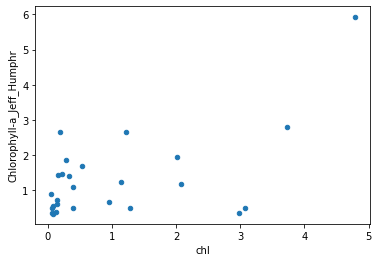

In [38]:
cruise.plot.scatter('chl', 'Chlorophyll-a_Jeff_Humphr')

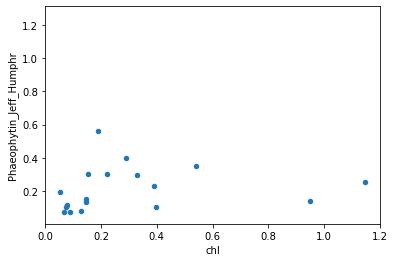

In [39]:
cruise.plot.scatter('chl', 'Phaeophytin_Jeff_Humphr', xlim=[0, 1.2])

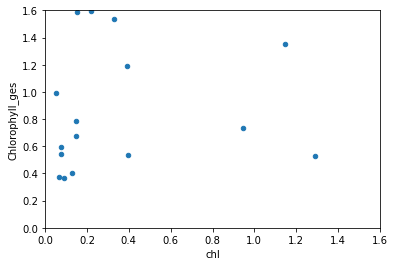

In [40]:
cruise.plot.scatter('chl', 'Chlorophyll_ges', xlim=[0, 1.6], ylim=[0, 1.6])